# Q.2 A

In [1]:
import numpy as np

X = np.array([[10, 60, 10, 90],
              [20, 50, 40, 70],
              [30, 50, 30, 40],
              [20, 50, 20, 60],
              [10, 60, 30, 10]])

In [2]:
norm_X = np.linalg.norm(X, axis=1)
norm_X

array([109.08712115,  96.95359715,  76.81145748,  83.06623863,
        68.556546  ])

# Q.2 B

In [3]:
def cosine_similarity(x):
    dot_product = np.dot(x, x.T)
    norm_x = np.linalg.norm(x, axis=1)
    norm_y = norm_x.reshape(-1, 1)
    
    return dot_product / norm_x / norm_y


In [4]:
cosine_similarity(X)

array([[1.        , 0.93604728, 0.85927665, 0.97114627, 0.65519967],
       [0.93604728, 1.        , 0.95338522, 0.98093136, 0.76728608],
       [0.85927665, 0.95338522, 1.        , 0.95604709, 0.8735402 ],
       [0.97114627, 0.98093136, 0.95604709, 1.        , 0.77264358],
       [0.65519967, 0.76728608, 0.8735402 , 0.77264358, 1.        ]])

# Q.2 C

In [5]:
def euclidean_distance(x):
    x = x.reshape(-1, 1, 4)
    y = x.reshape(1, -1, 4)
    return np.linalg.norm(x - y, axis=2)

In [6]:
euclidean_distance(X)

array([[ 0.        , 38.72983346, 58.30951895, 34.64101615, 82.46211251],
       [38.72983346,  0.        , 33.1662479 , 22.36067977, 62.44997998],
       [58.30951895, 33.1662479 ,  0.        , 24.49489743, 37.41657387],
       [34.64101615, 22.36067977, 24.49489743,  0.        , 52.91502622],
       [82.46211251, 62.44997998, 37.41657387, 52.91502622,  0.        ]])

# Q.3 B

In [7]:
D = np.hstack((X[:, :2], X[:, 3:]))
D

array([[10, 60, 90],
       [20, 50, 70],
       [30, 50, 40],
       [20, 50, 60],
       [10, 60, 10]])

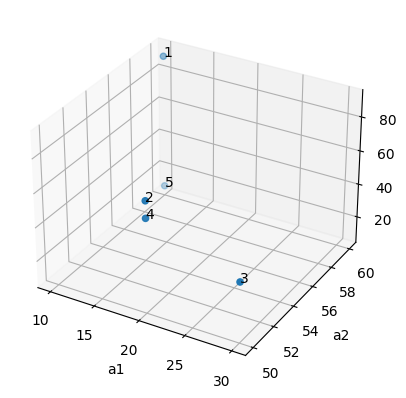

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d',)

ax.scatter(X[:,0],X[:,1],X[:,3])
ax.set_xlabel("a1")
ax.set_ylabel("a2")
ax.set_zlabel("a4")

for i in range(X.shape[0]):
    ax.text(X[i,0],X[i,1],X[i,3],str(i+1))


# Q.3 C

In [9]:
mean = np.mean(D, axis=0)
mean

array([18., 54., 54.])

# Q.3 F

In [10]:
Z = D - mean

In [11]:
cov = np.cov(Z, rowvar=False)
cov

array([[ 70., -40., -15.],
       [-40.,  30., -20.],
       [-15., -20., 930.]])

In [23]:
eig_values, eig_vectors = np.linalg.eigh(cov)
eig_values, eig_vectors

(array([  4.60865707,  94.71537456, 930.67596837]),
 array([[ 0.52611085,  0.85025739, -0.01642407],
        [ 0.8499905 , -0.5263604 , -0.02146802],
        [ 0.02689832,  0.00266574,  0.99963462]]))

In [14]:
# eig_vectors, eig_values = np.flip(eig_vectors), np.flip(eig_values)
# eig_values, eig_vectors

(array([930.67596837,  94.71537456,   4.60865707]),
 array([[ 0.99963462,  0.00266574,  0.02689832],
        [-0.02146802, -0.5263604 ,  0.8499905 ],
        [-0.01642407,  0.85025739,  0.52611085]]))

# Q.3 G

In [52]:
c = eig_vectors @ np.diag(eig_values) @ eig_vectors.T 
# c == cov
np.isclose(c, cov).all()

True

# Q.3 H

In [53]:
(eig_values[-1] / eig_values.sum()) * 100

90.35689013299381

the biggest eigen vector represents 90% of the variance in the data so it is sufficient to represent the data

# Q.3 I, J

In [54]:
transformed = Z @ eig_vectors[:, 1:]

In [55]:
transformed

array([[ -9.8642548 ,  35.98943074],
       [  3.84860823,  16.04717787],
       [ 12.27120986, -14.10610139],
       [  3.82195082,   6.05083167],
       [-10.07751411, -43.98133889]])

# Q.3 K

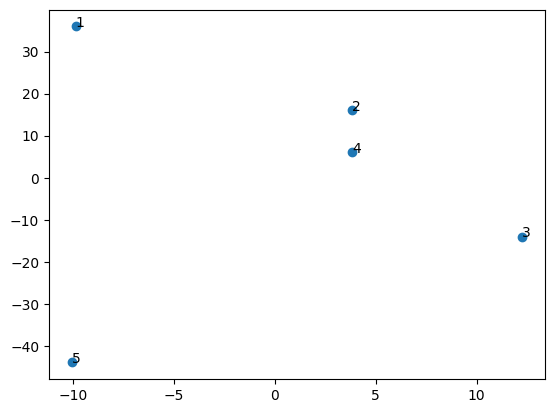

In [56]:
plt.scatter(transformed[:, 0], transformed[:, 1])
for i in range(transformed.shape[0]):
    plt.text(transformed[i, 0], transformed[i, 1], str(i+1))

In [57]:
a = np.array([
    [-1.34, 1.58, 0.54],
    [0.36, -1.42, -1.86],
    [2.06, -1.42, -0.86],
    [0.26, -1.02, 2.94],
    [-1.34, 0.28, -0.76],
])

In [59]:
a.T @ a


array([[ 8.032, -6.194, -1.382],
       [-6.194,  7.648,  1.504],
       [-1.382,  1.504, 13.712]])